<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## **1.0 Irish Weather**
### 1.1 Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2.0 Imported libraries & modules:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.freecodecamp.org%2Fnews%2Fcontent%2Fimages%2F2020%2F07%2Fpandas-logo.png&f=1&nofb=1&ipt=03dbb8d4e7d41ef87bf65cc0ec09f57f23f1036821f0aec702fb7a03ae7faf2d&ipo=images" alt="Pandas logo" width="150" height="50">

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

<img src="https://matplotlib.org/stable/_static/logo_light.svg" alt="Matplotlib logo" width="150" height="50">

### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.

<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn logo" width="150" height="50">

### 2.3 [Seaborn](https://seaborn.pydata.org/)
Seaborn: statistical data visualization.

<img src="https://numpy.org/images/logo.svg" alt="Numpy logo" width="150" height="50">

### 2.4 [Numpy](https://numpy.org/)
The fundamental package for scientific computing with Python.

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="Numpy logo" width="150" height="50">

### 2.5 [scikit-learn](https://scikit-learn.org/stable/index.html)
Machine Learning in Python.

In [40]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 3.0 Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below in 5.0. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

## 4.0 Load the dataset.
The dataset is loaded from the local location specified by the `file_path` variable using `pandas.read_csv()`.

In [41]:
# Load the data sets.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

## 5.0 Explore dataset
The next step is a detailed exploration of the dataset's variables and attributes.

In [42]:
df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Station Name: ATHENRY  14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes
None


In [44]:
print(df.head(25))

                        Station Name: ATHENRY
0                       Station Height: 40 M 
1                              year:  -  Year
2                             month: -  Month
3         rain:  -  Precipitation Amount (mm)
4          meant: -  Mean Air Temperature (C)
5   maxtp: -  Maximum Air Temperature (C)\t  
6    mintp: -  Minimum  Air Temperature (C)\t
7      mnmax: -  Mean Maximum Temperature (C)
8      mnmin: -  Mean Minimum Temperature (C)
9     gmin:  -  Grass Minimum Temperature (C)
10           wdsp:  -  Mean Wind Speed (knot)
11              mxgt:  -  Highest Gust (knot)
12        sun:   -  Sunshine duration (hours)
13                        ind:   -  Indicator


The three functions provided the same information, albeit in different output formats. Intriguingly, the last function, designed to display the first 25 records of the dataset, unexpectedly only returned the header data (We'll get to that below). However, we do learn the station's name, altitude, and 13 available data parameters, each presented with both its abbreviation and full name.

### 5.1 Cleaning the dataset.
Since this dataset was used for an assignment previously we knew that the data had to be normalized. This is the reason why even though we have used `print(df.head(25))` above the output wouldn't reflect the first 25 records because the csv values do start in row 20 only. So let's skip the first 20 rows.

In [45]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    177 non-null    int64  
 1   month   177 non-null    int64  
 2   meant   177 non-null    float64
 3   maxtp   177 non-null    float64
 4   mintp   177 non-null    float64
 5   mnmax   177 non-null    float64
 6   mnmin   177 non-null    float64
 7   rain    177 non-null    object 
 8   gmin    177 non-null    object 
 9   wdsp    177 non-null    float64
 10  maxgt   177 non-null    int64  
 11  sun     177 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 16.7+ KB
None


We can observe that there are no null values.

In [47]:
print(df.head(25))

    year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  maxgt  \
0   2010      3    5.5   13.9   -5.7    9.9    1.1   73.3   -6.4   6.8     45   
1   2010      4    8.8   18.5   -1.8   13.8    3.9   76.8   -2.3   6.3     40   
2   2010      5   10.4   24.5    0.2   15.6    5.2   38.4   -0.3   6.1     28   
3   2010      6   14.7   22.1    4.3   19.5    9.9   28.3    3.6   6.6     28   
4   2010      7   15.1   20.0    6.9   18.2   12.0  155.5    7.3   7.7     37   
5   2010      8   13.6   23.0    1.8   17.9    9.3   60.9    4.2   6.7     34   
6   2010      9   13.5   22.6    4.8   17.1   10.0  155.0    3.0   7.0     43   
7   2010     10    9.7   19.3   -3.1   13.9    5.6   71.9   -3.8   7.0     36   
8   2010     11    4.7   14.9   -7.5    8.1    1.2  130.1   -8.6   7.4     53   
9   2010     12   -1.0   11.5  -15.8    2.8   -4.7   32.3  -10.2   4.4     30   
10  2011      1    3.1   12.1   -6.3    6.6   -0.4  110.8   -9.9   5.7     37   
11  2011      2    6.4   14.

After excluding the initial 20 rows, the dataset comprises 177 rows and 12 columns. Data type analysis reveals 3 object columns, 3 integer columns (int64), and 6 float columns (float64).

In [48]:
print(df.tail(25))

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  \
152  2022     11    8.8   16.4   -1.8   11.9    5.7  156.2   -6.3   7.5   
153  2022     12    3.4   13.4   -8.1    6.7    0.2  114.3  -11.7   5.8   
154  2023      1    6.0   13.0   -6.0    8.9    3.1  113.9  -11.3   7.2   
155  2023      2    7.3   14.4   -3.9   10.4    4.2   42.0   -8.1   7.7   
156  2023      3    7.3   15.6   -2.2   10.7    4.0  185.9   -6.5   7.4   
157  2023      4    9.2   20.4   -1.2   13.5    4.9   93.4   -6.4   7.1   
158  2023      5   12.6   23.1    1.6   17.5    7.7   63.5   -1.2   5.9   
159  2023      6   16.7   27.0    7.3   21.8   11.6   93.8    2.1   6.1   
160  2023      7   14.8   22.0    6.6   18.2   11.4  224.1    2.9   6.9   
161  2023      8   15.4   24.9    6.6   19.1   11.7  129.1    4.7   6.8   
162  2023      9   14.6   27.7    3.8   19.1   10.2  148.2    1.7   6.1   
163  2023     10   11.0   20.7   -0.3   14.7    7.4  179.9   -3.1   6.2   
164  2023     11    7.6  

The data frame spans from March 2010 to November 2024. To ensure a consistent time frame for analysis we will work with full years only, hence excluding data for 2010 & 2024.

In [49]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


Now that we have explored the dataset and its attributes, we will focus our analysis on the following variables: Temperature (meant, maxtp & mintp), windspeed (wdsp & maxgt) and precipitation (rain). Let's revisit the data types of these columns to ensure they are correctly formatted for further analysis:

In [50]:
print(df[['wdsp', 'maxgt', 'rain', 'meant', 'maxtp', 'mintp', 'mnmax', 'mnmin']].dtypes)

wdsp     float64
maxgt      int64
rain      object
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
dtype: object


The 'rain' column is still an object type, so it requires further attention. We will address this issue later in the analysis.

## 6.0 Statistics.
### 6.1 Temperature statistics.

Calculate average temperature per year.

In [51]:
# Ensure the 'meant', 'mnmax', and 'mnmin' columns are numeric.
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df.loc[:, 'mnmax'] = pd.to_numeric(df['mnmax'], errors='coerce')
df.loc[:, 'mnmin'] = pd.to_numeric(df['mnmin'], errors='coerce')
df.loc[:, 'maxtp'] = pd.to_numeric(df['maxtp'], errors='coerce')
df.loc[:, 'mintp'] = pd.to_numeric(df['mintp'], errors='coerce')

# Group by year and calculate the average temperature statistics.
temp_stats = df.groupby('year')[['meant', 'mnmax', 'mnmin', 'maxtp', 'mintp']].mean().reset_index()

print("Average Temperature per Year:")
print(temp_stats)

Average Temperature per Year:
    year      meant      mnmax     mnmin      maxtp     mintp
0   2011   9.775000  13.491667  6.083333  18.025000  0.708333
1   2012   9.525000  13.125000  5.908333  17.941667  0.066667
2   2013   9.625000  13.366667  5.908333  18.291667  0.550000
3   2014  10.041667  13.908333  6.191667  18.050000  0.850000
4   2015   9.358333  13.275000  5.466667  17.383333 -0.008333
5   2016   9.750000  13.441667  6.025000  18.600000  0.250000
6   2017   9.925000  13.541667  6.275000  18.158333  0.941667
7   2018   9.750000  13.625000  5.866667  19.216667 -1.025000
8   2019   9.825000  13.625000  6.050000  18.283333 -0.141667
9   2020   9.908333  13.683333  6.125000  18.766667 -0.175000
10  2021  10.225000  13.958333  6.491667  19.441667  0.391667
11  2022  10.266667  14.316667  6.225000  19.416667  0.358333
12  2023  10.800000  14.525000  7.108333  19.600000  0.291667


Let's plot the yearly temperature statistics with a trendline:

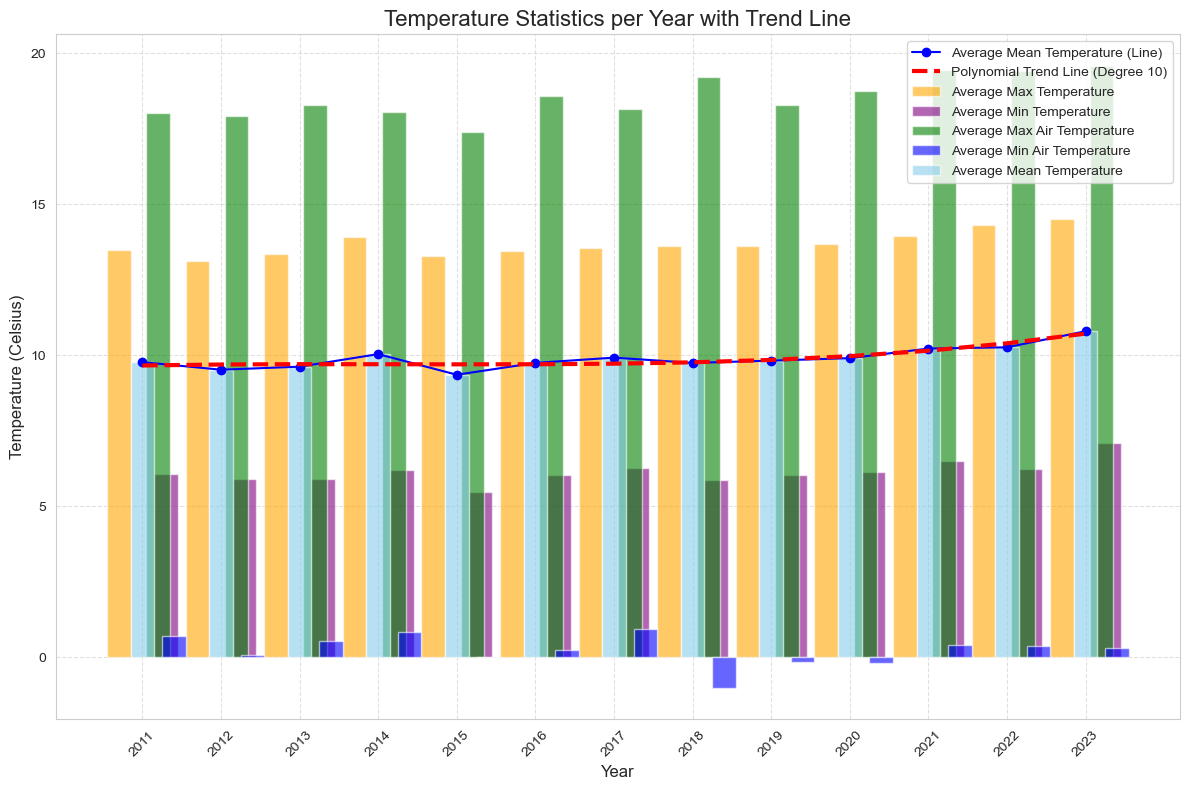

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Prepare data for polynomial regression.
X = temp_stats[['year']].values  
y = temp_stats['meant'].values  
degree = 10  # Degree of the polynomial.

# Create a polynomial regression model pipeline.
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the data.
poly_model.fit(X, y)

# Generate predictions for the polynomial trend line.
y_poly_pred = poly_model.predict(X)

# Plot.
plt.figure(figsize=(12, 8))

# Bar charts and adding alpha=0.6 for visualizing overlapping bar charts.
# Max temperature.
plt.bar(temp_stats['year'] - 0.3, temp_stats['mnmax'], width=0.3, color='orange', alpha=0.6, label='Average Max Temperature') 

# Min temperature.
plt.bar(temp_stats['year'] + 0.3, temp_stats['mnmin'], width=0.3, color='purple', alpha=0.6, label='Average Min Temperature')

# Max air temperature.
plt.bar(temp_stats['year'] + 0.2, temp_stats['maxtp'], width=0.3, color='green', alpha=0.6, label='Average Max Air Temperature')

# Min air temperature.
plt.bar(temp_stats['year'] + 0.4, temp_stats['mintp'], width=0.3, color='blue', alpha=0.6, label='Average Min Air Temperature')

# Mean temperature.
plt.bar(temp_stats['year'], temp_stats['meant'], width=0.3, color='skyblue', alpha=0.6, label='Average Mean Temperature')

# Line chart for mean temperature.
plt.plot(temp_stats['year'], temp_stats['meant'], marker='o', color='blue', linestyle='-', label='Average Mean Temperature (Line)')

# Polynomial trend line for mean temperature.
plt.plot(temp_stats['year'], y_poly_pred, color='red', linestyle='--', linewidth=3, label='Polynomial Trend Line (Degree 10)')

# Title and labels.
plt.title('Temperature Statistics per Year with Trend Line', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)

# X-axis.
plt.xticks(temp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

The mean annual temperature hovers around 10 degrees Celsius, exhibiting a gradual upward trend as suggested by polynomial analysis, consistent with the global pattern of rising temperatures [1][2][3]. In fact, 2011-2020 was the warmest decade on record globally and for Ireland [4].

While none of the analyzed years exceeded a maximum average temperature of 20 degrees Celsius, this may not fully capture peak temperatures due to the use of yearly averages. Analyzing average monthly maximum daytime temperatures would provide a more accurate assessment of extreme heat events

Conversely, examining the average yearly minimum temperature offers a clearer picture of temperature trends, particularly in winter. This is because day and night temperatures exhibit less fluctuation during winter compared to summer. The year 2018, marked by the infamous 'Beast from the East', saw significantly sub-zero temperatures [5][6].

### 6.2 Windspeed statistics.
Calculate average windspeed per year.

In [53]:
# Ensure the 'wdsp' and 'mxgt' columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'maxgt'] = pd.to_numeric(df['maxgt'], errors='coerce')

# Group by year and calculate the average windspeed statistics.
wdsp_stats = df.groupby('year')[['wdsp', 'maxgt']].mean().reset_index()

print("Average Windspeed per Year:")
print(wdsp_stats)

Average Windspeed per Year:
    year      wdsp      maxgt
0   2011  7.866667  42.083333
1   2012  7.458333  37.750000
2   2013  7.691667  40.000000
3   2014  7.325000  38.000000
4   2015  7.808333  40.250000
5   2016  7.025000  37.166667
6   2017  7.158333  38.333333
7   2018  7.150000  40.583333
8   2019  7.200000  38.500000
9   2020  7.591667  43.333333
10  2021  6.566667  35.000000
11  2022  6.983333  37.333333
12  2023  6.916667  38.166667


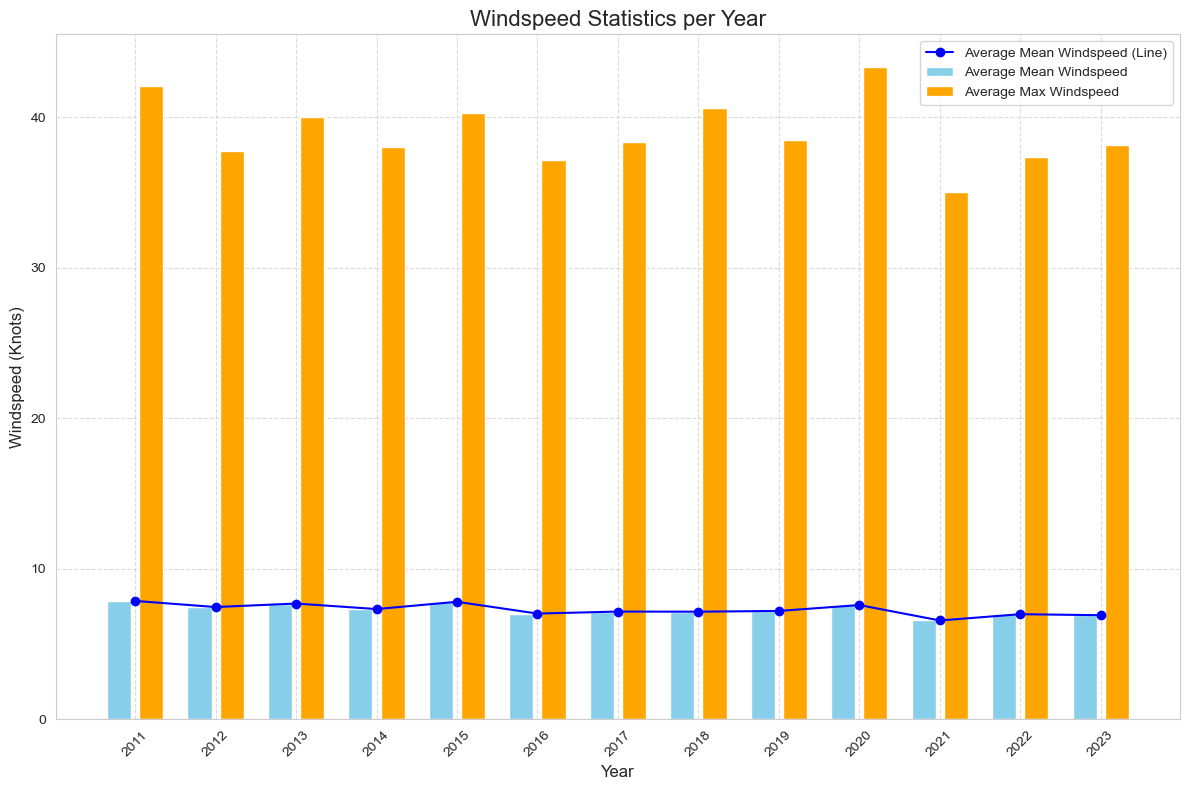

In [54]:
# Plot.
plt.figure(figsize=(12, 8))  

# Bar chart for max temperature.
plt.bar(wdsp_stats['year'] - 0.2, wdsp_stats['wdsp'], width=0.3, color='skyblue', label='Average Mean Windspeed')

# Bar chart for min temperature.
plt.bar(wdsp_stats['year'] + 0.2, wdsp_stats['maxgt'], width=0.3, color='orange', label='Average Max Windspeed')

# Line chart for mean temperature.
plt.plot(wdsp_stats['year'], wdsp_stats['wdsp'], marker='o', color='blue', linestyle='-', label='Average Mean Windspeed (Line)')

# Title and labels.
plt.title('Windspeed Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Windspeed (Knots)', fontsize=12)

# X-axis.
plt.xticks(wdsp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

The average mean windspeed fluctuates between 6.91 knots in 2023 and 7.87 knots in 2011, indicating that, when measured on a yearly basis, windspeeds remain relatively consistent over time.
However, certain years show higher average maximum windspeeds, but measured over the 13-year period, no clear patterns or trends are evident.

### 6.3 Rainfall statistics.
Calculate average rainfall per year.

In [55]:
# Ensure the 'rain' column is numeric.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017       100.0
7   2018   90.183333
8   2019       118.9
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


In [56]:
# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby('year')['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
    year        mean    max   min
0   2011  114.366667  160.3  44.2
1   2012  105.508333  175.6  30.5
2   2013   94.245455  220.3  36.9
3   2014  105.358333  182.5  10.4
4   2015  131.316667  299.4  44.9
5   2016   89.733333  145.2  49.2
6   2017       100.0  157.7  13.5
7   2018   90.183333  173.2  25.2
8   2019       118.9  297.3  46.1
9   2020  123.483333  248.5  46.8
10  2021   93.683333  167.3  23.9
11  2022   98.208333  199.3  39.0
12  2023  132.516667  224.1  42.0


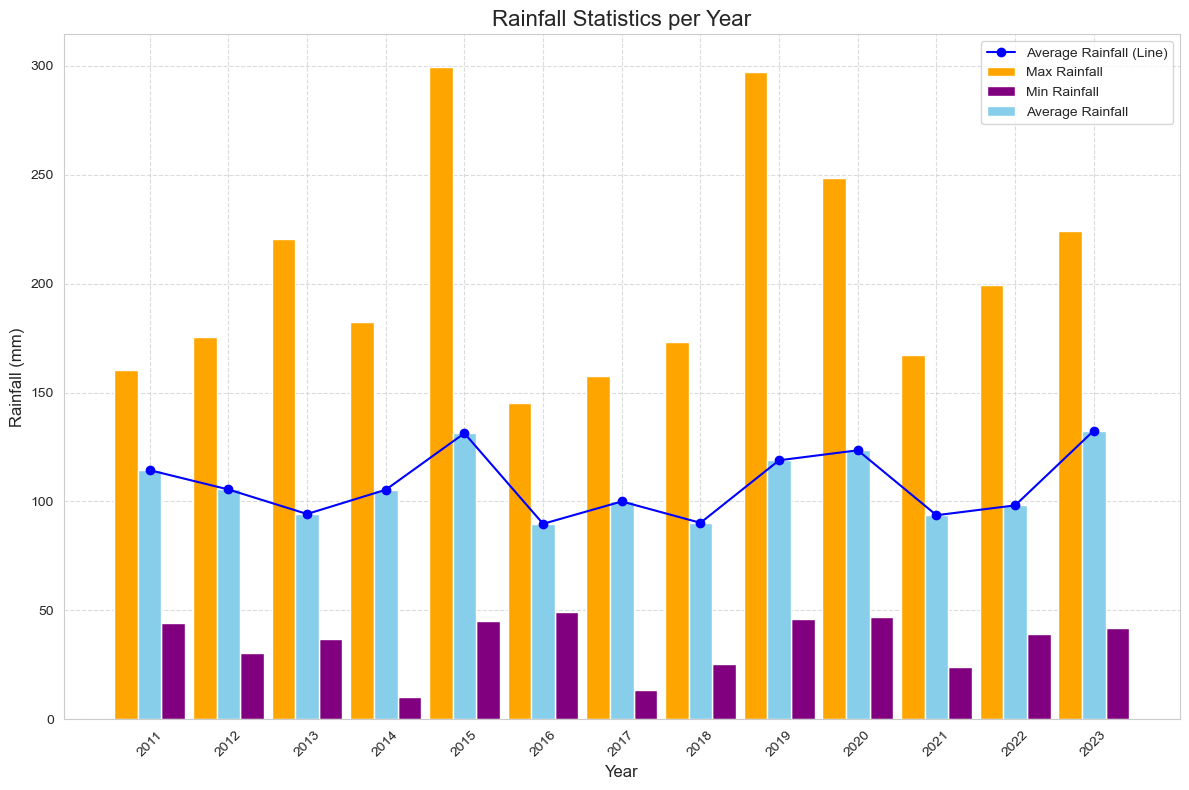

In [57]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max rainfall.
plt.bar(rainfall_stats['year'] - 0.3, rainfall_stats['max'], width=0.3, color='orange', label='Max Rainfall')

# Bar chart for min rainfall.
plt.bar(rainfall_stats['year'] + 0.3, rainfall_stats['min'], width=0.3, color='purple', label='Min Rainfall')

# Bar chart for average rainfall.
plt.bar(rainfall_stats['year'], rainfall_stats['mean'], width=0.3, color='skyblue', label='Average Rainfall')

# Line chart for average rainfall.
plt.plot(rainfall_stats['year'], rainfall_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Rainfall Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# X-axis.
plt.xticks(rainfall_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

Analysis of average annual rainfall reveals significant year-to-year variations. While no long-term trend is evident, years with higher average precipitation tend to have higher maximum and minimum precipitation values as well. This aligns with observations from Met Éireann's 2019 annual report, where the majority of annual rainfall totals exceeded the Long-Term Average (LTA) [7]. This explains the prominent spike in the maximum annual average for that year in the bar chart. Similar patterns were observed in 2015, another year where most annual rainfall totals were at or above the LTA [8], as reflected in the 2015 bar chart.

## 7.0 Monthly statistics over 4 years 2020-2023.
For a more comprehensive analysis it is highly beneficial to compare monthly statistics across four consecutive years.
### 7.1 Temperature.

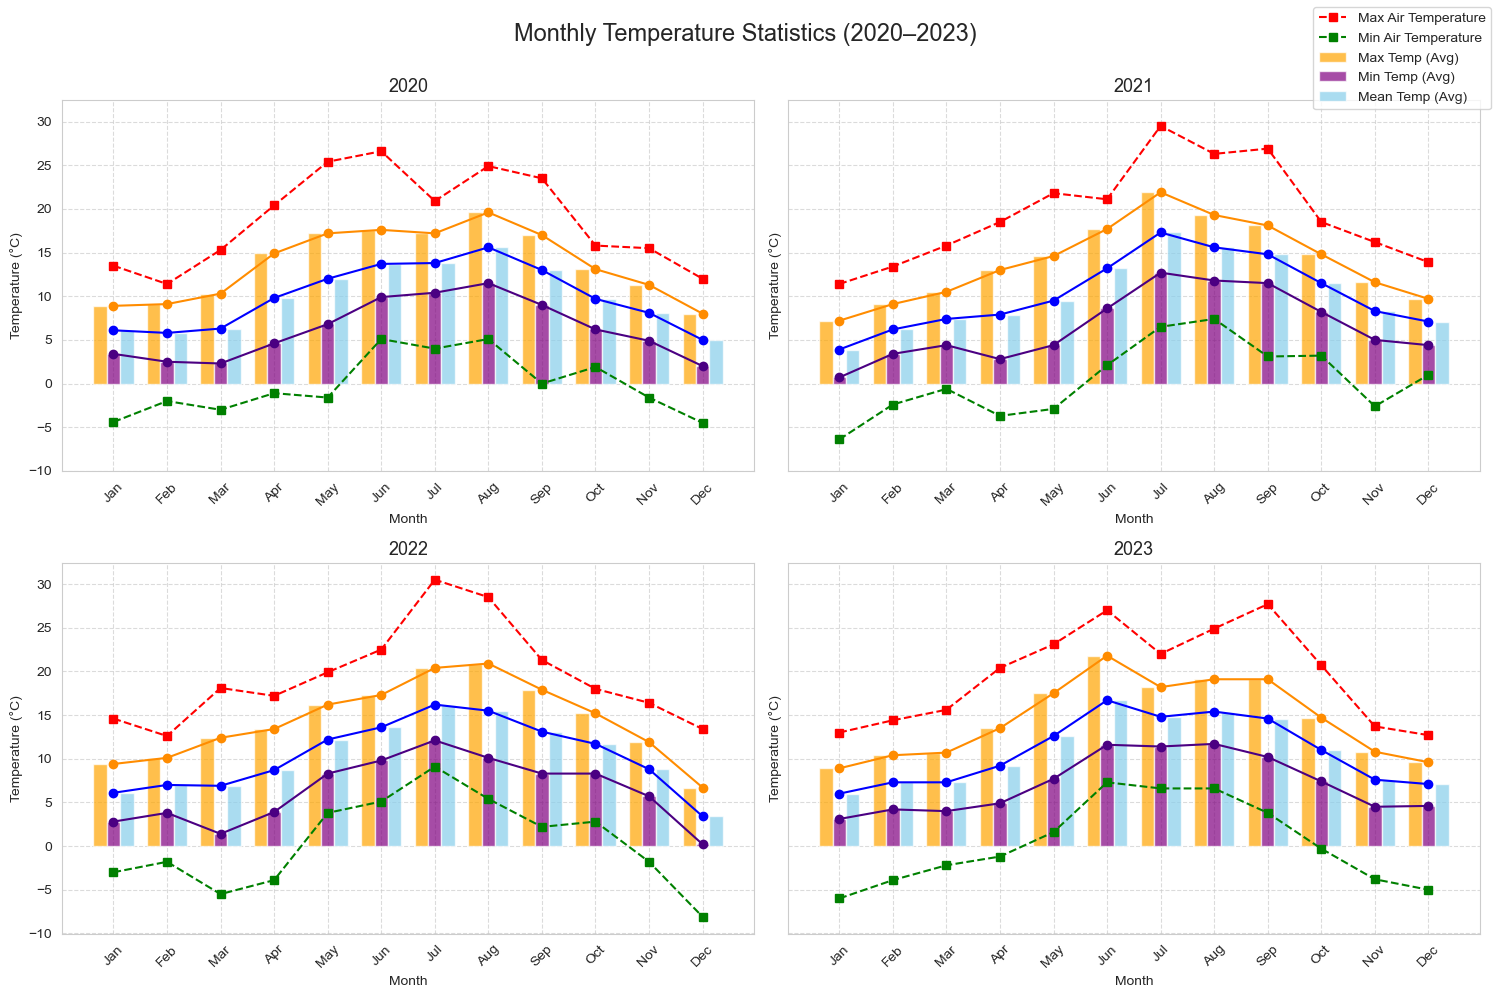

In [58]:
# Filter years 2020-2023.
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2024)]

# Group by year and month, calculating average statistics for each month.
monthly_stats = df_filtered.groupby(['year', 'month'])[['mnmax', 'mnmin', 'meant', 'maxtp', 'mintp']].mean().reset_index()

# Create a figure with four subplots (2 x 2).
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Years to plot.
years = range(2020, 2024)

for i, year in enumerate(years):
    ax = axes.flatten()[i]
    year_data = monthly_stats[monthly_stats['year'] == year]

    # Bar charts for each metric.
    bar_width = 0.25
    ax.bar(year_data['month'] - bar_width, year_data['mnmax'], width=bar_width, label='Max Temp (Avg)', color='orange', alpha=0.7)
    ax.bar(year_data['month'], year_data['mnmin'], width=bar_width, label='Min Temp (Avg)', color='purple', alpha=0.7)
    ax.bar(year_data['month'] + bar_width, year_data['meant'], width=bar_width, label='Mean Temp (Avg)', color='skyblue', alpha=0.7)
    
    # Line charts for each metric.
    ax.plot(year_data['month'], year_data['mnmax'], marker='o', linestyle='-', color='darkorange')
    ax.plot(year_data['month'], year_data['mnmin'], marker='o', linestyle='-', color='indigo')
    ax.plot(year_data['month'], year_data['meant'], marker='o', linestyle='-', color='blue')

    # Add `maxtp` and `mintp` as line charts.
    ax.plot(year_data['month'], year_data['maxtp'], marker='s', linestyle='--', color='red', label='Max Air Temperature')
    ax.plot(year_data['month'], year_data['mintp'], marker='s', linestyle='--', color='green', label='Min Air Temperature')

    # Set titles and labels and ensure all months are shown.
    ax.set_title(f'{year}', fontsize=13)
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(visible=True, linestyle='--', alpha=0.7)
    ax.set_xticks(range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45) 

# Add a common legend for all subplots.
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, fontsize=10)

# Adjust layout and spacing.
plt.tight_layout(rect=[0, 0, 1, 0.94])  
plt.suptitle('Monthly Temperature Statistics (2020–2023)', fontsize=17)
plt.show()


Examining the monthly temperatures over four consecutive years reveals the expected seasonal pattern: temperatures gradually increase leading into the summer months and then decline more sharply after September.

### 7.2 Windspeed.

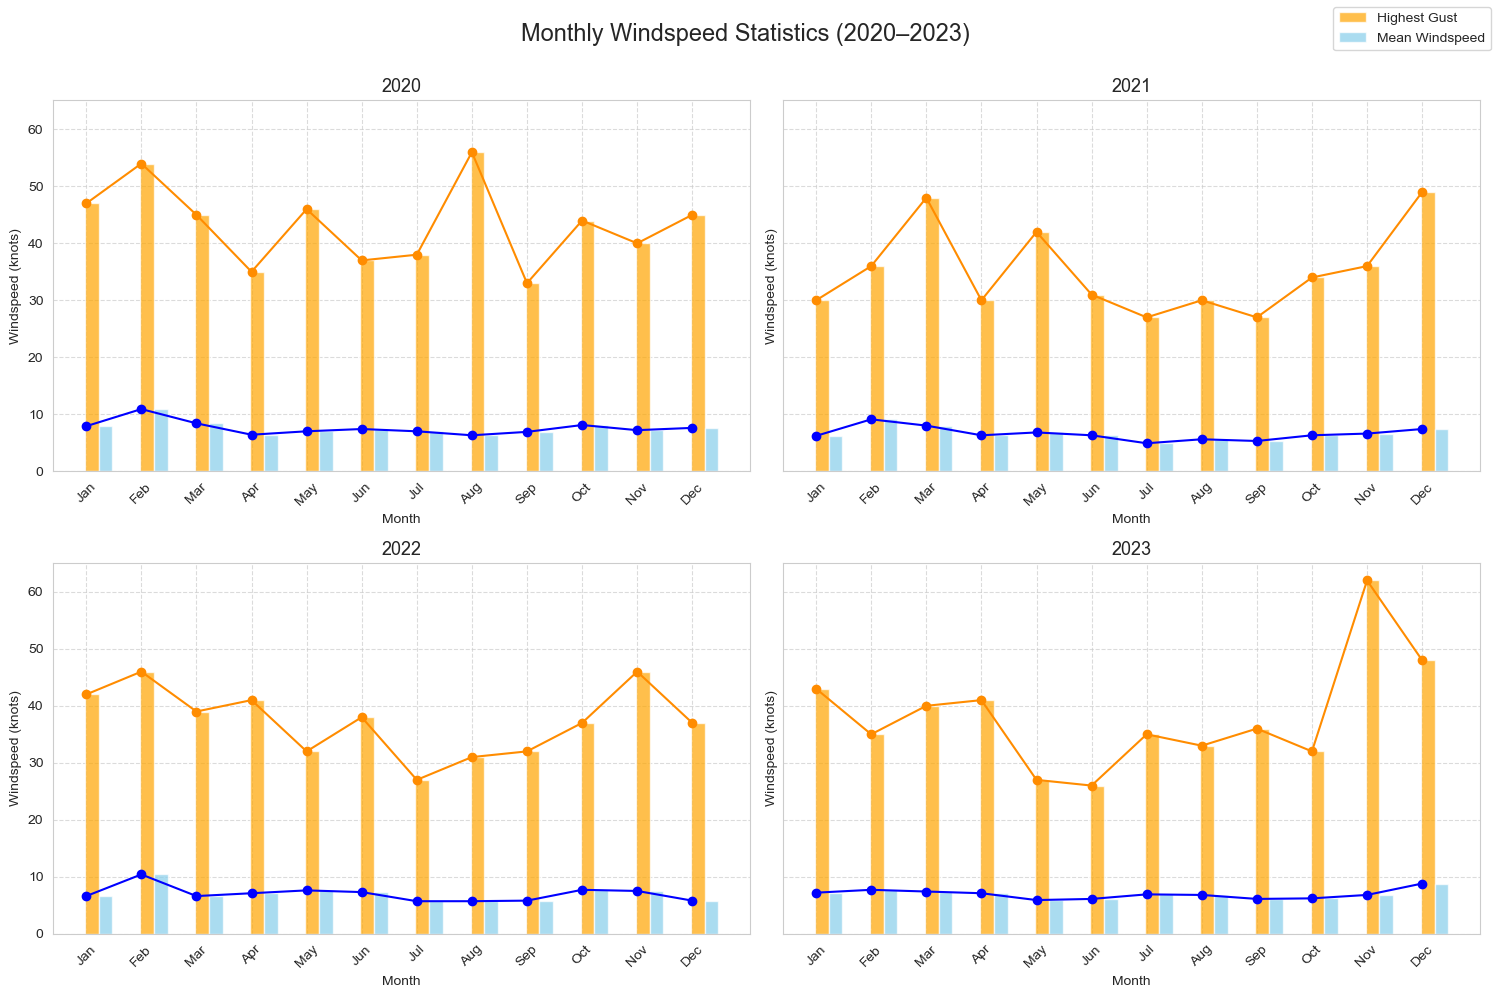

In [59]:
# Filter years 2020-2023.
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2024)]

# Group by year and month, calculating average statistics for each month.
monthly_stats = df_filtered.groupby(['year', 'month'])[['maxgt', 'wdsp']].mean().reset_index()

# Create a figure with four subplots (2 x 2).
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Years to plot.
years = range(2020, 2024)

for i, year in enumerate(years):
    ax = axes.flatten()[i]
    year_data = monthly_stats[monthly_stats['year'] == year]
    '''
    # Bar charts for each metric.
    bar_width = 0.25
    ax.bar(year_data['month'] + bar_width, year_data['maxgt'], width=bar_width, label='Highest Gust', color='orange', alpha=0.7)
    ax.bar(year_data['month'] - bar_width, year_data['wdsp'], width=bar_width, label='Mean Windspeed', color='skyblue', alpha=0.7)
    '''
    # Bar charts for each metric.
    bar_width = 0.25
    ax.bar(year_data['month'] + 0.1, year_data['maxgt'], width=bar_width, label='Highest Gust', color='orange', alpha=0.7)
    ax.bar(year_data['month'] + bar_width + 0.1, year_data['wdsp'], width=bar_width, label='Mean Windspeed', color='skyblue', alpha=0.7)
    
    # Line charts for each metric.
    ax.plot(year_data['month'], year_data['maxgt'], marker='o', linestyle='-', color='darkorange')
    ax.plot(year_data['month'], year_data['wdsp'], marker='o', linestyle='-', color='blue')

    # Set titles and labels and ensure all months are shown.
    ax.set_title(f'{year}', fontsize=13)
    ax.set_xlabel('Month')
    ax.set_ylabel('Windspeed (knots)')
    ax.grid(visible=True, linestyle='--', alpha=0.7)
    ax.set_xticks(range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

# Add a common legend for all subplots.
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, fontsize=10)

# Adjust layout and spacing.
plt.tight_layout(rect=[0, 0, 1, 0.94])  
plt.suptitle('Monthly Windspeed Statistics (2020–2023)', fontsize=17)
plt.show()

Examining the monthly windspeed data over several years reveals a more dynamic picture compared to the yearly averages. Mean windspeed tends to peak during the winter months, aligning with the increased frequency of heavy storms. This pattern is further supported by the observation that the highest wind gusts are more likely to occur during the colder months, though exceptions, such as in 2020, demonstrate that extreme gusts can happen at other times of the year as well. In fact the spike in August 2020 represents storm Ellen which happened Wednesday night 19th and Thursday 20th August 2020 [9].

### 7.3 Rainfall.

In [60]:
# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby(['year', 'month'])['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
     year  month   mean    max    min
0    2011      1  110.8  110.8  110.8
1    2011      2  146.5  146.5  146.5
2    2011      3   44.2   44.2   44.2
3    2011      4   66.9   66.9   66.9
4    2011      5  117.6  117.6  117.6
..    ...    ...    ...    ...    ...
151  2023      8  129.1  129.1  129.1
152  2023      9  148.2  148.2  148.2
153  2023     10  179.9  179.9  179.9
154  2023     11  113.5  113.5  113.5
155  2023     12  202.9  202.9  202.9

[156 rows x 5 columns]


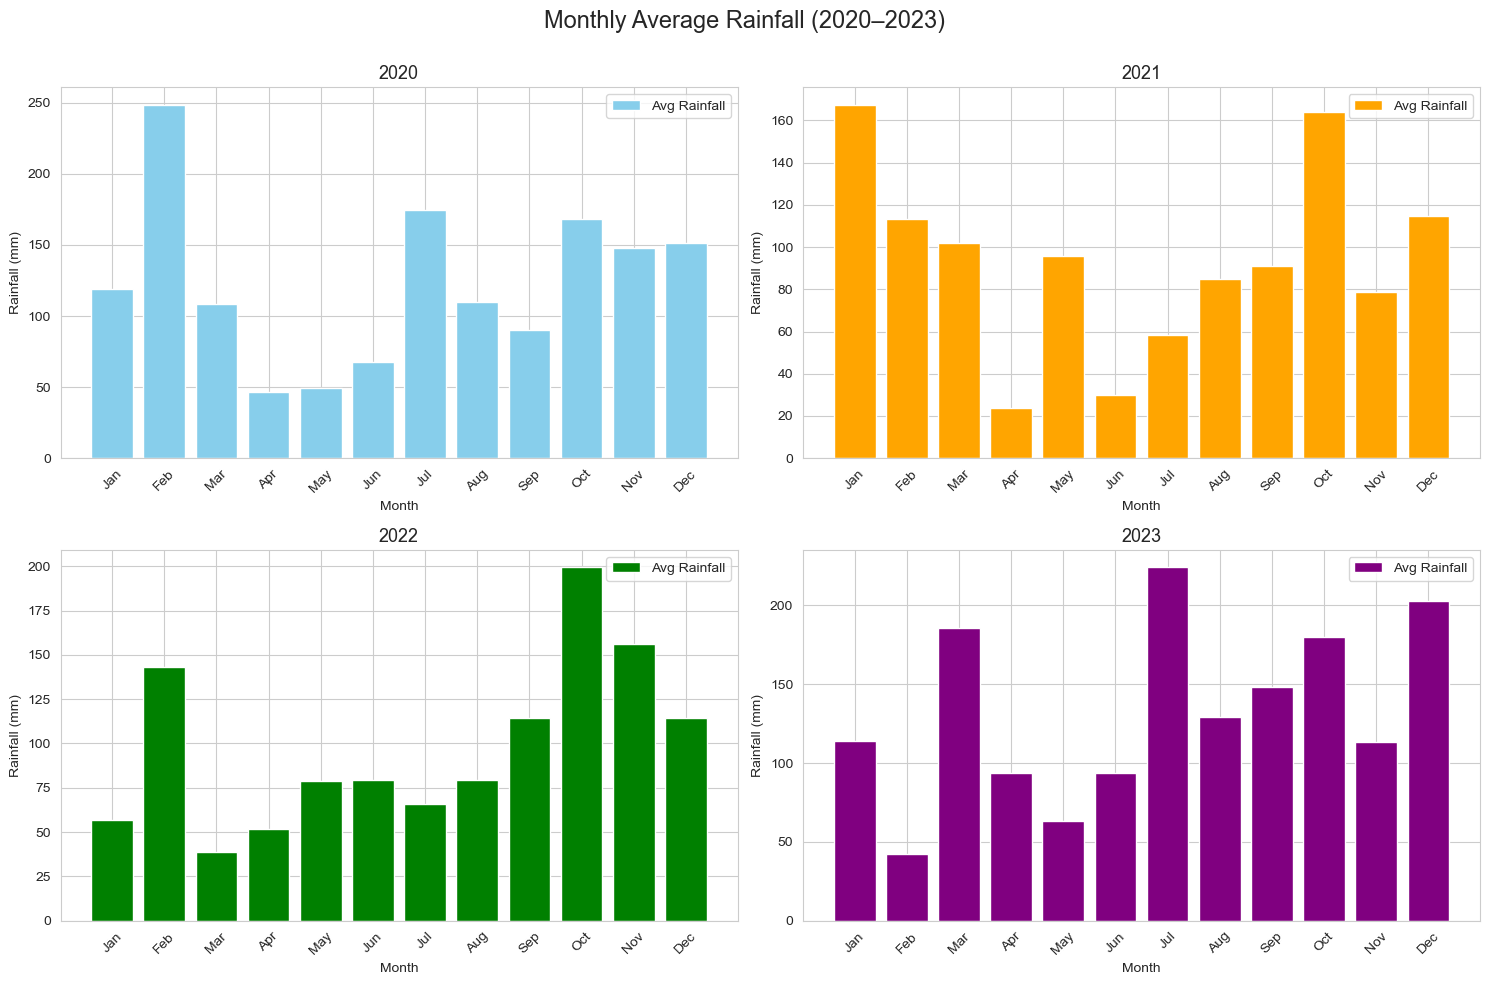

In [61]:
# Convert 'rain' to numeric.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Filter data for the years 2020-2023.
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2023)]

# Calculate monthly average rainfall for each year.
rainfall_stats = df_filtered.groupby(['year', 'month'])['rain'].mean().reset_index()

# Setup for subplots.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot each year's data in a separate subplot.
years = [2020, 2021, 2022, 2023]
colors = ['skyblue', 'orange', 'green', 'purple']

for i, year in enumerate(years):
    # Filter the data for the current year.
    data = rainfall_stats[rainfall_stats['year'] == year]
    
    # Access the current axis.
    ax = axes[i]
    
    # Create bar plot for mean rainfall.
    ax.bar(data['month'], data['rain'], color=colors[i], label='Avg Rainfall')
    
    # Set title and axis labels.
    ax.set_title(f"{year}", fontsize=13)
    ax.set_xlabel('Month')
    ax.set_ylabel('Rainfall (mm)')
    ax.set_xticks(range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
    ax.legend()

# Adjust layout and display the plot.
plt.tight_layout(rect=[0, 0, 1, 0.94])  
plt.suptitle('Monthly Average Rainfall (2020–2023)', fontsize=17)
plt.show()

The monthly rainfall data over four consecutive years reveals a rather erratic pattern, which is something we are quite familiar with in Ireland. While spring and summer months typically tend to be drier, this trend was notably disrupted in 2023, which experienced significant rainfall in both March and July. Interestingly, although 2023 was Ireland's warmest year on record by a significant margin, it also marked the wettest March and July ever recorded [10].

## 8.0 Further analysis.
We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them, but before proceed let's have another look at the data attributes to make sure they are fit for analysis:

In [62]:
print(df[['wdsp', 'rain', 'meant', 'maxtp', 'mintp']].dtypes)
print(df[['wdsp', 'rain', 'meant', 'maxtp', 'mintp']].isna().sum())
print(df[['wdsp', 'rain', 'meant', 'maxtp', 'mintp']].info())

wdsp     float64
rain      object
meant    float64
maxtp    float64
mintp    float64
dtype: object
wdsp     0
rain     1
meant    0
maxtp    0
mintp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 10 to 165
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wdsp    156 non-null    float64
 1   rain    155 non-null    object 
 2   meant   156 non-null    float64
 3   maxtp   156 non-null    float64
 4   mintp   156 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.3+ KB
None


All columns (*wdsp, rain, meant, maxtp, mintp*) have a data type of float64 indicating they contain numerical values that support floating-point operations. The column *rain* has no missing values (0 missing) whereas *wdsp, meant, maxtp*, and *mintp* each have 1 missing value each which we will address in the code below to avoid issues during analysis.

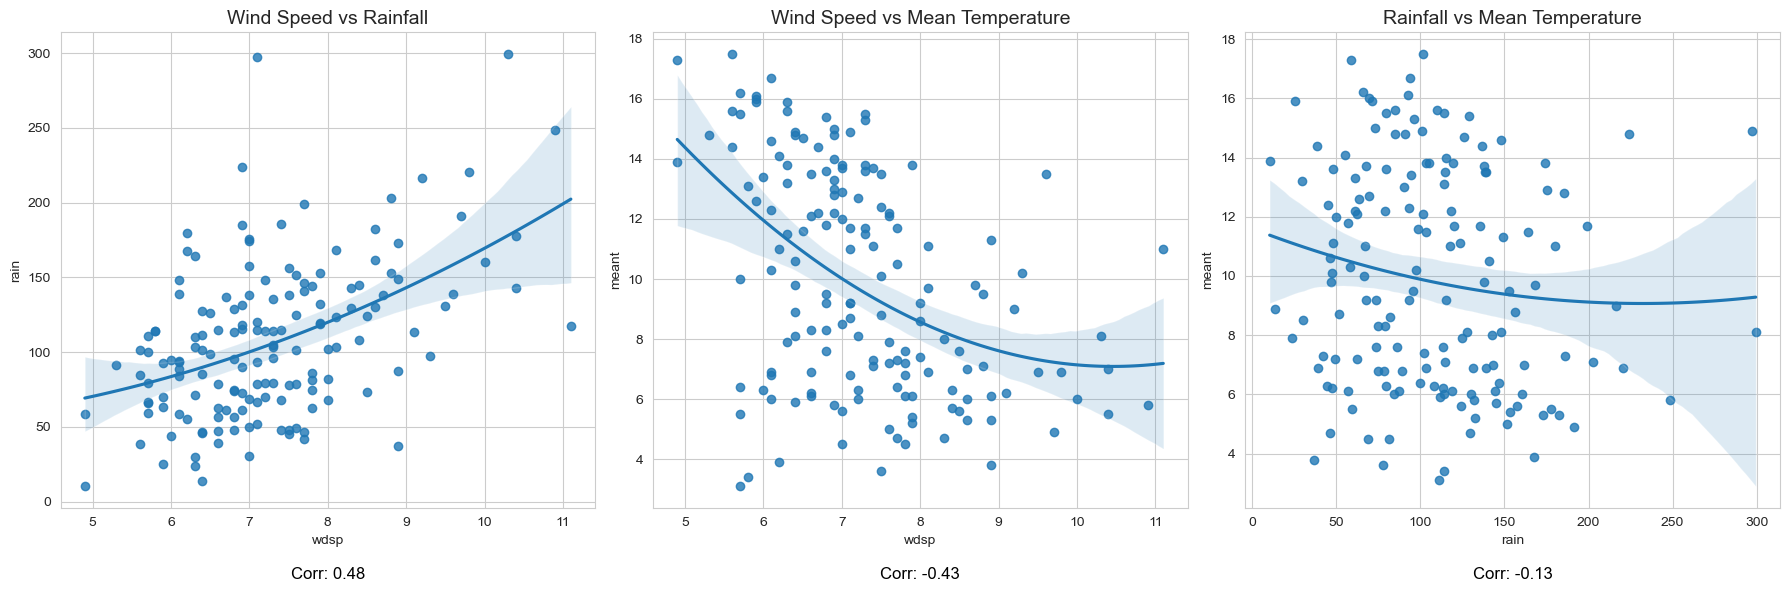

In [ ]:
# Ensure columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df[pd.to_numeric(df['rain'], errors='coerce').isna()]

# Ensuring all values are floats.
df['wdsp'] = df['wdsp'].astype('float64')
df['rain'] = df['rain'].astype('float64')
df['meant'] = df['meant'].astype('float64')

# Handle missing values, drop rows with NaNs etc.
df = df.dropna(subset=['wdsp', 'rain', 'meant'])

# Set style.
sns.set_style('whitegrid')

# Create a figure with 3 subplots in a single row.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plots = [
    ('wdsp', 'rain', 'Wind Speed vs Rainfall'),
    ('wdsp', 'meant', 'Wind Speed vs Mean Temperature'),
    ('rain', 'meant', 'Rainfall vs Mean Temperature'),
]

# Loop over the axes and data.
for ax, (x, y, title) in zip(axes, plots):
    # Scatter plot with regression line.
    sns.regplot(x=x, y=y, data=df, order=2, ax=ax)
    ax.set_title(title, fontsize=14)
    
    # Calculate and display correlation coefficient.
    corr_coef = np.corrcoef(df[x].dropna(), df[y].dropna())[0, 1]
    ax.annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', fontsize=12, color='black')

# Adjust layout.
plt.tight_layout()
plt.show()

Windspeed vs. Rainfall:

The correlation coefficient of 0.47 indicates a moderate positive correlation windspeed and rainfall. This means as windspeed increases, rainfall also tends to increase but while while there is some degree of association between windspeed and rainfall, other factors likely influence the relationship as well. In this case a correlation of 0.47 suggests that higher windspeed tend to be somewhat associated with increased precipitation, but this is not a strong or definitive relationship.

Windspeed vs. Mean Temperature:

The correlation coefficient of -0.43 indicates a moderate negative correlation between windspeed and mean temperature. A negative correlation means that as one variable increases, the other tends to decrease or in other words, there’s an inverse relationship between the two variables. This value suggests that while there is a noticeable relationship, it is not particularly strong or perfectly linear. A correlation of -0.43 might imply that higher temperatures are generally associated with lower windspeed, but with some variability.

Rainfall vs. Mean Temperature:

The correlation coefficient of -0.13 indicates a very weak negative correlation between windspeed and mean temperature. Since the value of -0.13 is close to zero, it suggests that the relationship between the two variables is minimal or negligible what means that changes in one variable are not strongly associated with changes in the other. In this case it might imply a very slight tendency for higher rainfall to be associated with lower temperatures, but the effect is so weak that it may not be practically meaningful.




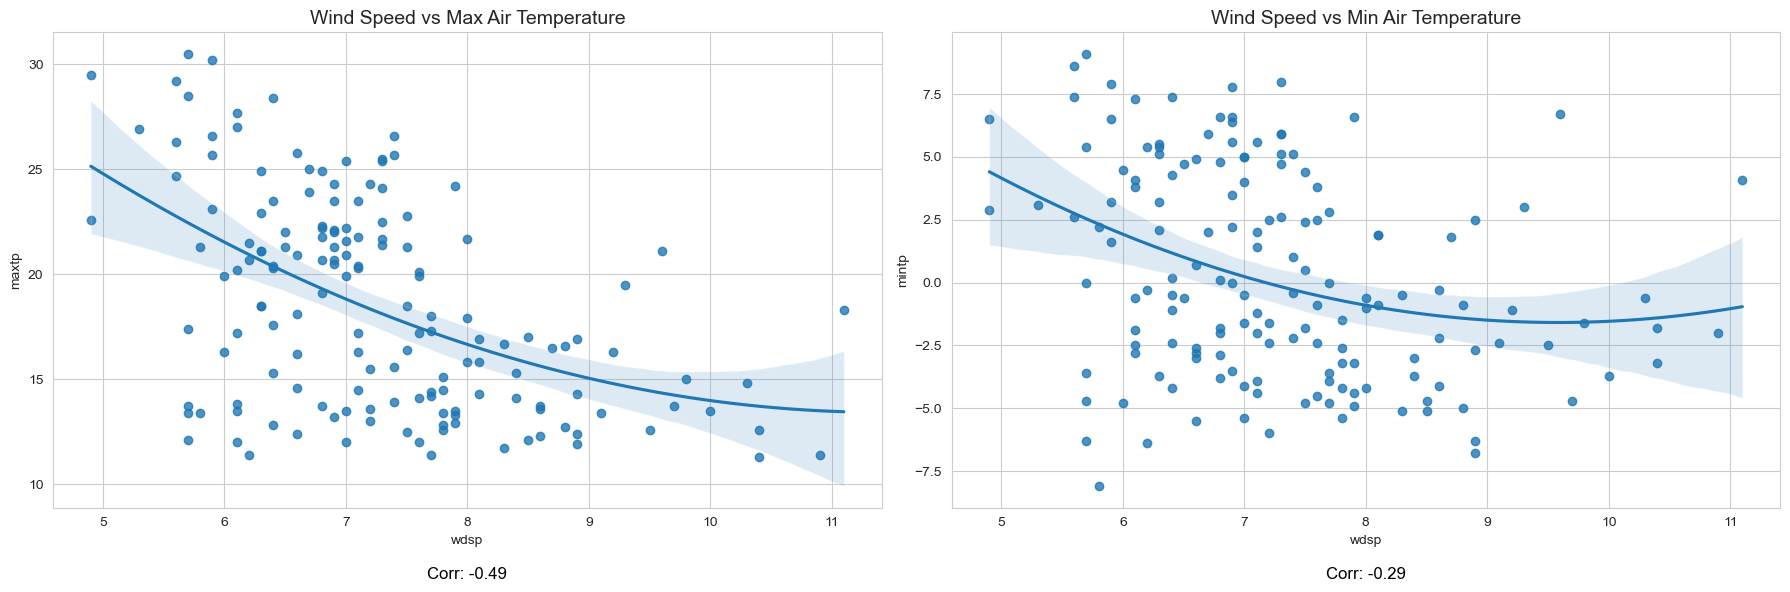

In [ ]:
# Ensure columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'maxtp'] = pd.to_numeric(df['maxtp'], errors='coerce')
df.loc[:, 'mintp'] = pd.to_numeric(df['mintp'], errors='coerce')

# Ensuring all values are floats.
df.loc[:, 'wdsp'] = df['wdsp'].astype('float64')
df.loc[:, 'maxtp'] = df['maxtp'].astype('float64')
df.loc[:, 'mintp'] = df['mintp'].astype('float64')

# Handle missing values, drop rows with NaNs etc.
df = df.dropna(subset=['wdsp', 'maxtp', 'mintp'])

# Set style.
sns.set_style('whitegrid')

# Create a figure with 2 subplots in a single row.
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plots = [
    ('wdsp', 'maxtp', 'Wind Speed vs Max Air Temperature'),
    ('wdsp', 'mintp', 'Wind Speed vs Min Air Temperature'),
]

# Loop over the axes and data.
for ax, (x, y, title) in zip(axes, plots):
    # Scatter plot with regression line.
    sns.regplot(x=x, y=y, data=df, order=2, ax=ax)
    ax.set_title(title, fontsize=14)
    
    # Calculate and display correlation coefficient.
    corr_coef = np.corrcoef(df[x].dropna(), df[y].dropna())[0, 1]
    ax.annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', fontsize=12, color='black')

# Adjust layout.
plt.tight_layout()
plt.show()

The correlation between windspeed and maximum air temperature is similar to that between windspeed and mean temperature, as expected. However, the correlation between windspeed and minimum air temperature is even weaker, with a correlation coefficient of -0.29.

We have learned that rainfall patterns in Ireland are known to be erratic. Let’s compare them with London. However, before diving into the comparison, we will first revisit the yearly averages for Athenry in the west of Ireland:

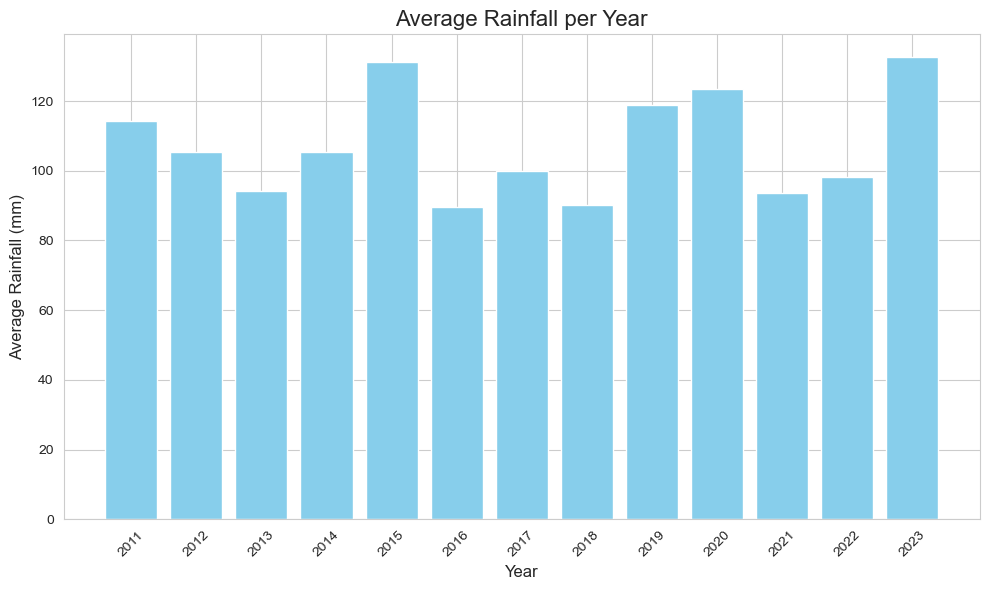

In [ ]:
# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average rainfall per year oscillates between under 100 mm in some years to way over 120 mm in other years. Let's have a look at the minimum and maximum averages per year.

## 9.0 London weather.
### 9.1 Load the dataset.
The dataset is loaded from the local location specified by the `file_path` variable using *pandas.read_csv()*.
Datasource is https://github.com/pc1991/London-Weather-Data-From-1979-To-2023/tree/main?tab=readme-ov-file.

In [27]:
file_path2 = r"C:\Users\User\ATU\PFDA\Project\london_weather_data_1979_to_2023.csv"
df2 = pd.read_csv(file_path2, on_bad_lines='skip')

### 9.2 Inspect the dataset.

In [28]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [ ]:
print(df2.columns)
print(df2.head(40))

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')
        DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...     RR  \
0   19790101  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...    4.0   
1   19790102  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...    0.0   
2   19790103  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...    0.0   
3   19790104  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...    0.0   
4   19790105  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...    0.0   
5   19790106  83.0     0 -66.0     0  -5.0     0  38.0     0  1.0  ...    7.0   
6   19790107  85.0     0 -53.0     0  15.0     0   0.0     0  0.0  ...   52.0   
7   19790108  58.0     1  53.0     0  69.0     1   1.0     0  0.0  ...    8.0   
8   19790109  52.0     0  16.0     0  37.0     0  58.0     0  0.0  ...   72.0  

In [ ]:
print(df2.tail(25))

           DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
16411  20231207  118.0     0   13.0     0   51.0     0   0.0     0  0.0  ...   
16412  20231208  134.0     0   57.0     0   88.0     0  36.0     0  0.0  ...   
16413  20231209  125.0     0   76.0     0  105.0     0   9.0     0  0.0  ...   
16414  20231210  115.0     0   75.0     0  100.0     0   5.0     0  0.0  ...   
16415  20231211  116.0     0   88.0     0  102.0     0  17.0     0  0.0  ...   
16416  20231212   82.0     1   62.0     0   89.0     1  10.0     0  0.0  ...   
16417  20231213   85.0     0   76.0     0   79.0     0   0.0     0  0.0  ...   
16418  20231214  105.0     0   25.0     0   55.0     0   0.0     0  0.0  ...   
16419  20231215  115.0     0   40.0     0   72.0     0   0.0     0  0.0  ...   
16420  20231216  121.0     0   55.0     0   85.0     0   0.0     0  0.0  ...   
16421  20231217  128.0     0   93.0     0  107.0     0  16.0     0  0.0  ...   
16422  20231218  123.0     0   93.0     

### 9.3 Normalize the dataset.
We have gathered a lot of useful information about the dataset. For example the dataset start on 01.01.1979 and ends on 31.12.2024, also it has a total of 21 columns made up of the following datatypes: datetime64ns(1), float64(10), int64(10). It also contains a column RR representing the daily precipitation averages. This is the column we will now contrast with the rainfall data of Athenry.

In [ ]:
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d') 
print(df2.head(10))

        DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...    RR  \
0 1979-01-01  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...   4.0   
1 1979-01-02  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...   0.0   
2 1979-01-03  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...   0.0   
3 1979-01-04  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...   0.0   
4 1979-01-05  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...   0.0   
5 1979-01-06  83.0     0 -66.0     0  -5.0     0  38.0     0  1.0  ...   7.0   
6 1979-01-07  85.0     0 -53.0     0  15.0     0   0.0     0  0.0  ...  52.0   
7 1979-01-08  58.0     1  53.0     0  69.0     1   1.0     0  0.0  ...   8.0   
8 1979-01-09  52.0     0  16.0     0  37.0     0  58.0     0  0.0  ...  72.0   
9 1979-01-10  49.0     0  14.0     0  33.0     0  19.0     0  0.0  ...  21.0   

   Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
0     0  52.0     0  10190.0     0  83.0     0  2.0     0  

In [32]:
print(df2.tail(10))

            DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
16426 2023-12-22  136.0     0   88.0     0  107.0     0   0.0     0  0.0  ...   
16427 2023-12-23  153.0     0   84.0     0  110.0     0  12.0     0  0.0  ...   
16428 2023-12-24  129.0     0  102.0     0  128.0     0   0.0     0  0.0  ...   
16429 2023-12-25  121.0     1  116.0     0  122.0     1   0.0     0  0.0  ...   
16430 2023-12-26  124.0     0   62.0     0   92.0     0  12.0     0  0.0  ...   
16431 2023-12-27  126.0     0   55.0     0   89.0     0   0.0     0  0.0  ...   
16432 2023-12-28  119.0     0   97.0     0  112.0     0   2.0     0  0.0  ...   
16433 2023-12-29  122.0     0   92.0     0  106.0     0   7.0     0  0.0  ...   
16434 2023-12-30  107.0     0   56.0     0   89.0     0   0.0     0  0.0  ...   
16435 2023-12-31  124.0     0   57.0     0   82.0     0   5.0     0  0.0  ...   

         RR  Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
16426   0.0     0  12.0     0  10131.0

We'll drop all date values beyond 01.01.2011 and 31.12.2023:

In [33]:
# Filter the DataFrame for dates between 2011-01-01 and 2023-12-31.
start_date = '2011-01-01'
end_date = '2023-12-31'
df2_filtered = df2[(df2['DATE'] >= start_date) & (df2['DATE'] <= end_date)] 

print(df2_filtered.head(25))

            DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
11688 2011-01-01   40.0     1   46.0     1   59.0     1   0.0     0  0.0  ...   
11689 2011-01-02   29.0     1   19.0     0   30.0     1   1.0     0  0.0  ...   
11690 2011-01-03   60.0     0   -3.0     0   13.0     0   1.0     0  0.0  ...   
11691 2011-01-04   71.0     0   -3.0     0   29.0     0   0.0     0  NaN  ...   
11692 2011-01-05   51.0     0   13.0     0   42.0     0  23.0     0  0.0  ...   
11693 2011-01-06  110.0     0   39.0     0   45.0     0   0.0     0  NaN  ...   
11694 2011-01-07  100.0     0   10.0     0   60.0     0   0.0     0  0.0  ...   
11695 2011-01-08   72.0     0   39.0     0   70.0     0  18.0     0  0.0  ...   
11696 2011-01-09   89.0     0    9.0     0   41.0     0  67.0     0  0.0  ...   
11697 2011-01-10   87.0     0  -19.0     0   35.0     0   3.0     0  0.0  ...   
11698 2011-01-11  129.0     0   48.0     0   68.0     0   1.0     0  0.0  ...   
11699 2011-01-12  137.0     

Next we'll create another dataframe that on;y contains the relevant columns for this project: 'DATE' between 2011-01-01 and 2023-12-31 and 'RR' for the precipitation data:

In [34]:
df2_filtered = df2_filtered[['DATE', 'RR']]
print(df2_filtered.head(25))

            DATE     RR
11688 2011-01-01    6.0
11689 2011-01-02    0.0
11690 2011-01-03    0.0
11691 2011-01-04    0.0
11692 2011-01-05   10.0
11693 2011-01-06  110.0
11694 2011-01-07  136.0
11695 2011-01-08    2.0
11696 2011-01-09    2.0
11697 2011-01-10   70.0
11698 2011-01-11   60.0
11699 2011-01-12    4.0
11700 2011-01-13   10.0
11701 2011-01-14   72.0
11702 2011-01-15    0.0
11703 2011-01-16   84.0
11704 2011-01-17  176.0
11705 2011-01-18    0.0
11706 2011-01-19    2.0
11707 2011-01-20    0.0
11708 2011-01-21    2.0
11709 2011-01-22    2.0
11710 2011-01-23    8.0
11711 2011-01-24    6.0
11712 2011-01-25    4.0


Last we calculate the yearly averages which are to be multiplied by 10 as the soucre data is represented in 0.1 mm.

In [35]:
yearly_avg_rr = df2_filtered.groupby(df2_filtered['DATE'].dt.year)['RR'].mean() *10 # Multiply by 10 as source data is 0.1 mm.

# Create a new DataFrame with the results
yearly_avg_df2_filtered = pd.DataFrame({'year': yearly_avg_rr.index, 'avg_rr': yearly_avg_rr.values})

print(yearly_avg_df2_filtered) 

    year      avg_rr
0   2011  139.506849
1   2012  193.278689
2   2013  153.452055
3   2014  236.712329
4   2015  153.972603
5   2016  161.366120
6   2017  156.767123
7   2018  158.904110
8   2019  178.684932
9   2020  181.038251
10  2021  181.479452
11  2022  158.301370
12  2023  208.767123


### 8.4 Plot London rainfall averages.

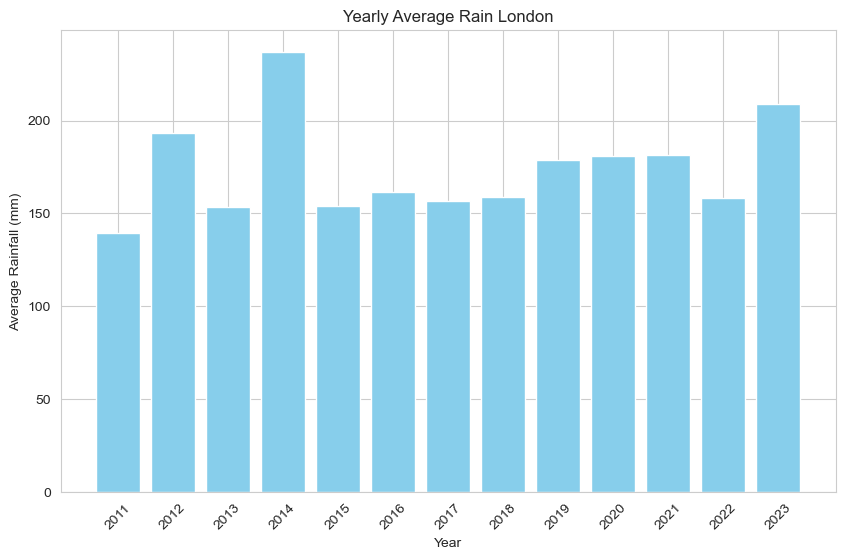

In [ ]:
yearly_avg_rr = df2_filtered.groupby(df2_filtered['DATE'].dt.year)['RR'].mean() *10 # Multiply by 10 as source data is 0.1 mm.

# Create a new DataFrame with the results.
yearly_avg_df2_filtered = pd.DataFrame({'year': yearly_avg_rr.index, 'avg_rr': yearly_avg_rr.values})

# Create bar chart.
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_df2_filtered['year'], yearly_avg_df2_filtered['avg_rr'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Yearly Average Rain London')
plt.xticks(yearly_avg_df2_filtered['year'], rotation=45) 
plt.show()

A rather surprising and concerning observation has emerged: the yearly precipitation averages for London appear higher than those for the west of Ireland. This discrepancy suggests an error in the data or calculations. Despite this, let’s proceed to examine the monthly averages for London in 2023:

In [37]:
# Filter the dataset for the year 2023.
df_2023 = df2_filtered[df2_filtered['DATE'].dt.year == 2023]

# Group by month and calculate the average rainfall.
monthly_avg_rr_2023 = (
    df_2023.groupby(df_2023['DATE'].dt.month)['RR']
    .mean()
    .reset_index()
)

# Multiply by 10 to convert rainfall from 0.1 mm to mm.
monthly_avg_rr_2023['RR'] *= 10

# Rename columns for clarity.
monthly_avg_rr_2023.columns = ['month', 'avg_rr']

print(monthly_avg_rr_2023)

    month      avg_rr
0       1  190.322581
1       2   15.000000
2       3  298.064516
3       4  219.333333
4       5  123.870968
5       6  189.333333
6       7  198.064516
7       8  170.967742
8       9  198.000000
9      10  376.774194
10     11  261.333333
11     12  246.451613


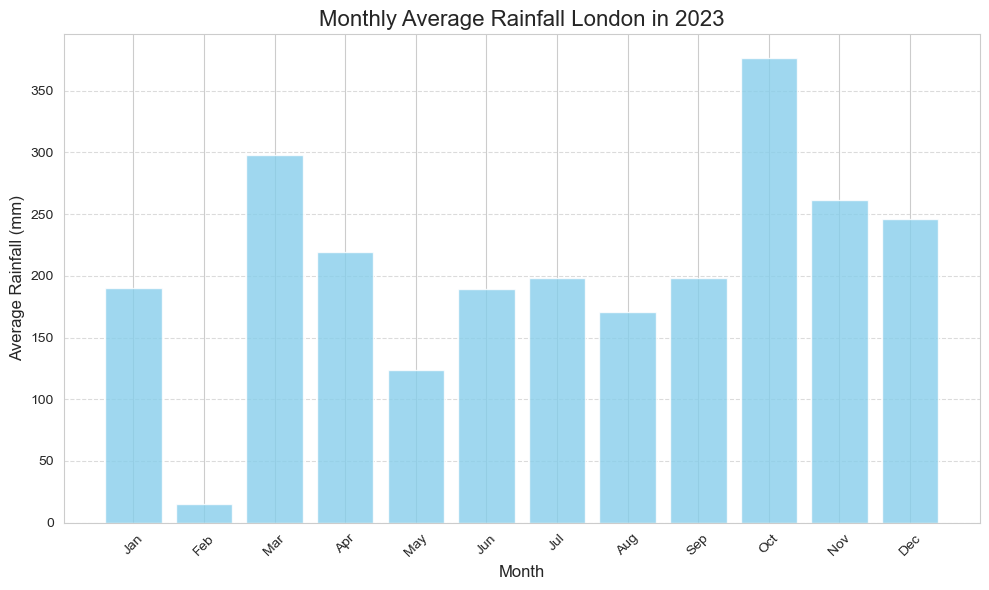

In [ ]:
import matplotlib.pyplot as plt

# Plot the monthly average rainfall for 2023.
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_rr_2023['month'], monthly_avg_rr_2023['avg_rr'], color='skyblue', alpha=0.8)

# Add titles and labels.
plt.title('Monthly Average Rainfall London in 2023', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)

# Customize the x-axis to show month names.
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)

# Add grid lines for better visualization.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

The monthly averages further highlight the same concern, with values that are noticeably higher. 

## 10.0 Contrast Athenry rainfall vs. London.
### 10.1 Plot.

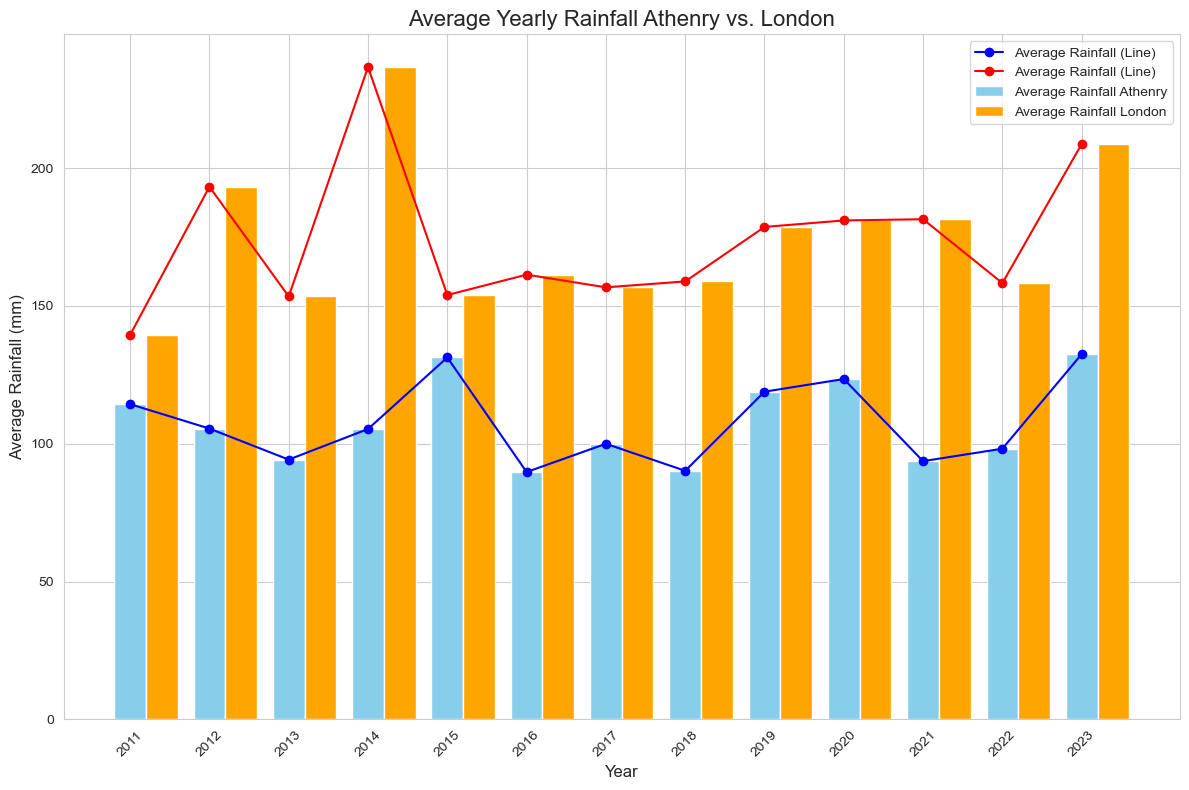

In [ ]:
# Combine two bar charts into one plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Yearly average rainfall per year London.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], 
        color='skyblue', width=0.4, label='Average Rainfall Athenry')

# Yearly average rainfall Athenry.
plt.bar(yearly_avg_df2_filtered['year'] + 0.4, yearly_avg_df2_filtered['avg_rr'], 
        color='orange', width=0.4, label='Average Rainfall London')

# Line chart for average rainfall.
plt.plot(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')
plt.plot(yearly_avg_df2_filtered['year'], yearly_avg_df2_filtered['avg_rr'], marker='o', color='red', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Average Yearly Rainfall Athenry vs. London', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)

# Add x-axis ticks.
plt.xticks(avg_rainfall_per_year['year'], rotation=45)

# Add a legend.
plt.legend()

# Adjust layout for better visualization.
plt.tight_layout()

# Plot.
plt.show()

This plot clearly demonstrate our findings above: Higher averages for London suggest an error in the data or calculations. Of course we asked ourselves the question if it potentially rains more but less erratically in London but average precipitation is higher in Ireland than in the UK.

## 11.0 Summary.
The weather in Ireland is typically described as maritime or oceanic, due to its location in the North Atlantic Ocean and the influence of the Gulf Stream. This climate type is also known as a temperate maritime climate or Cfb in the Köppen climate classification system. Although there are seasonal patterns in Irish weather, rainfall and strong gusts of wind can occur at any time of the year. It’s no surprise that Ireland is often said to experience all four seasons in a single day. Average winter temperatures are relatively mild (with exceptions), while summers remain cool compared to continental climates at similar latitudes. Despite this, a gradual increase in mean temperature can be observed, consistent with the global trend of rising temperatures.

While a comparison to London precipitation averages suggests potential discrepancies in the data or calculations, the monthly rainfall figures for Ireland are considered accurate as they directly correspond to values within the 'rain' column of the CSV file. Consequently, the analysis of Irish weather remains valid and aligns with findings from other studies on this topic.

## 12.0 References.

<div style="border: 1px solid #2196F3; background-color: #E3F2FD; padding: 10px; border-radius: 5px;">
Regarding the code, I primarily referred to the official documentation of the libraries utilized in this project. Additionally, I drew on examples and concepts covered in both the current module's lectures and those from previous modules..
</div>

**Unformatted references:**

https://github.com/andrewbeattycourseware/pands-course-material
https://github.com/andrewbeattycourseware/PFDA-courseware/tree/main

Combining PolynomialFeatures and LinearRegression into a single model:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
https://stackoverflow.com/questions/69443936/sklearn-pipeline-with-standardscaler-polynomialfeatures-and-regression

Machine Learning:

https://www.geeksforgeeks.org/rainfall-prediction-using-machine-learning-python/

pandas.DataFrame.loc:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas-dataframe-loc

Irish weather phrases:

https://www.twinkl.ie/blog/10-common-irish-weather-phrases

**Formatted references:**

[1] Kevin O'Sullivan. "Ireland’s future weather will be even warmer and wetter than predicted, scientists warn". *The Irish Times*, 03 Jan. 2025, 
https://www.irishtimes.com/environment/climate-crisis/2025/01/03/ireland-will-be-warmer-and-wetter-than-predicted-due-to-climate-disruption-scientists-warn/. Accessed 05 Jan. 2025.

[2] Center for Science Education. "Predictions of Future Global Climate". *SCIED UCAR*, n.d., https://scied.ucar.edu/learning-zone/climate-change-impacts/predictions-future-global-climate. Accessed 05 Jan. 2025.

[3] Jeff Tollefson. "Earth shattered heat records in 2023 and 2024: is global warming speeding up?". *Nature.com*, 06 Jan 2025, https://www.nature.com/articles/d41586-024-04242-z. Accessed 07 Jan. 2025

[4] Met Éireann. "2011-2020 the warmest decade on record globally and for Ireland". *Met Éireann*, 05 Dec. 2023, https://www.met.ie/warmest-decade-on-record-globally-and-for-ireland-2011-2020. Accessed 11 Jan. 2025.

[5] Niamh Towey, Simon Bracken. "This day last year it was 18 degrees colder as Beast from the East struck". *The Irish Times*, 28 Feb. 2019, https://www.irishtimes.com/news/ireland/irish-news/this-day-last-year-it-was-18-degrees-colder-as-beast-from-the-east-struck-1.3809900. Accessed 01 Jan. 2025.

[6] Government of Ireland. "Storm Emma, An Analysis of Storm Emma and the cold spell which, struck Ireland between the 28th of February and the 4th, of March 2018". *Met Éireann*, n.d.,https://www.met.ie/cms/assets/uploads/2019/02/EmmaReport2019.pdf. Accessed 11 Jan. 2025.

[7] Met Éireann. "Annual 2019 Ireland". *met.ie*, n.d., https://www.met.ie/climate-statement-for-2019. Accessed 09 Jan 2025.

[8] Met Éireann. "Annual 2015 Ireland". *Edepositireland*, n.d., https://edepositireland.ie/bitstream/handle/2262/77499/clim-2015-ann.pdf?sequence=1&isAllowed=y. Accessed 09 Jan 2025.

[9] Met Éireann. "Storm Ellen". *met.ie*, n.d., https://www.met.ie/cms/assets/uploads/2020/08/StormEllen-003.pdf. Accessed 11 Jan 2025. 

[10] Met Éireann. "Annual Climate Statement for 2023". *met.ie*, n.d., https://www.met.ie/annual-climate-statement-for-2023. Accessed 11 Jan 2025.


**Pearson Correlation Coefficient:**

Zach Bobbitt. "Pearson Correlation Coefficient". *statology.org*, 03 Jan 2019, https://www.statology.org/pearson-correlation-coefficient/. Accessed 11 Jan 2025.

**Additional sources & further readings:**

Theodore Petrou. "Pandas Cookbook: Recipes for Scientific Computing, Time Series Analysis and Data Visualization using Python". Packt Publishing Ltd, 2017.

National Centers for Environmental Information. "Annual 2023 Global Climate Report". *NCEI*, n.d., https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202313. Accessed Jan 2025.




















https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html